<a href="https://colab.research.google.com/github/buthaina279/DS_Capstone_NLP/blob/main/classify.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Import Libraries

from textblob import TextBlob
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os
import nltk
from google.colab import drive  
#import pycountry
import re
import string

from wordcloud import WordCloud, STOPWORDS
from PIL import Image
from nltk.sentiment.vader import SentimentIntensityAnalyzer
#from langdetect import detect
from nltk.stem import SnowballStemmer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from sklearn.feature_extraction.text import CountVectorizer

/usr/local/lib/python3.6/dist-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


In [83]:
# Connect Google Drive to Colab
drive.mount('/content/gdrive')
# Create a variable to store the data path on your drive
path = './gdrive/My Drive/datasets/twitter_analysis'

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [76]:
saudia_airlines = pd.read_csv("./gdrive/My Drive/datasets/twitter_analysis/saudia_airlines_en.csv")

In [40]:
saudia_airlines.head(10)

,Unnamed: 0,tweet_id,created_at,text,likes,retweeted,location,language,airline,Tweet_nonstop
0,14,1335393841810202624,2020-12-06 01:21:16,dear guest there is no flight from india to s...,1,False,Saudi Arabia,en,Saudi_airlines,"['', 'dear', 'guest', 'flight', 'india', 'saud..."
1,23,1335337522738720770,2020-12-05 21:37:29,hello dear guest we hope you check and be inf...,1,False,Saudi Arabia,en,Saudi_airlines,"['', 'hello', 'dear', 'guest', 'hope', 'check'..."
2,29,1335334320014315521,2020-12-05 21:24:45,hello dear guest please provide us with the b...,0,False,Saudi Arabia,en,Saudi_airlines,"['', 'hello', 'dear', 'guest', 'please', 'prov..."
3,38,1335322063851167748,2020-12-05 20:36:03,dear guest there is no flight from india to s...,1,False,Saudi Arabia,en,Saudi_airlines,"['', 'dear', 'guest', 'flight', 'india', 'saud..."
4,43,1335314759588122626,2020-12-05 20:07:02,hello dear guest you can follow up the flight...,1,False,Saudi Arabia,en,Saudi_airlines,"['', 'hello', 'dear', 'guest', 'follow', 'flig..."
5,50,1335306576312356865,2020-12-05 19:34:31,dear guest there is no flight from india to s...,0,False,Saudi Arabia,en,Saudi_airlines,"['', 'dear', 'guest', 'flight', 'india', 'saud..."
6,51,1335304974679613443,2020-12-05 19:28:09,hello dear valued guest once the confirmation...,1,False,Saudi Arabia,en,Saudi_airlines,"['', 'hello', 'dear', 'valued', 'guest', 'conf..."
7,53,1335276146653589507,2020-12-05 17:33:36,dear guest there is no flight from india to s...,0,False,Saudi Arabia,en,Saudi_airlines,"['', 'dear', 'guest', 'flight', 'india', 'saud..."
8,55,1335275872295804928,2020-12-05 17:32:30,dear guest there is no flight from india to s...,0,False,Saudi Arabia,en,Saudi_airlines,"['', 'dear', 'guest', 'flight', 'india', 'saud..."
9,57,1335266364739694593,2020-12-05 16:54:44,hello dear guest imran please provide us with...,0,False,Saudi Arabia,en,Saudi_airlines,"['', 'hello', 'dear', 'guest', 'imran', 'pleas..."


#Lexicon-based Approach

This approach utilizes lexicon or dictionaries. In this step semantic orientation or polarity of words or phrases in the document are used in calculating the orientation for a document.

#Create a function to get the subjectivity

Opinions are usually subjective expressions that describe people’s sentiments, appraisals, or feelings toward entities, events, and their properties.

In [64]:
def getSubjectivity(text):
   return TextBlob(text).sentiment.subjectivity

# Create a function to get the polarity

Sentiment analysis is a method of identifying attitudes in text data about a subject of interest. It is scored using polarity values that range from 1 to -1. Values closer to 1 indicate more positivity, while values closer to -1 indicate more negativity.

In [65]:
def getPolarity(text):
   return  TextBlob(text).sentiment.polarity

In [77]:
# Create two new columns 'Subjectivity' & 'Polarity'
saudia_airlines['sentiment_confidence'] = saudia_airlines['Tweet_nonstop'].apply(getSubjectivity)
saudia_airlines['polarity'] = saudia_airlines['Tweet_nonstop'].apply(getPolarity)

# Show the new dataframe with columns 'Subjectivity' & 'Polarity'
saudia_airlines.head(10)

,Unnamed: 0,tweet_id,created_at,text,likes,retweeted,location,language,airline,Tweet_nonstop,sentiment_confidence,polarity
0,14,1335393841810202624,2020-12-06 01:21:16,dear guest there is no flight from india to s...,1,False,Saudi Arabia,en,Saudi_airlines,"['', 'dear', 'guest', 'flight', 'india', 'saud...",0.900,0.600
1,23,1335337522738720770,2020-12-05 21:37:29,hello dear guest we hope you check and be inf...,1,False,Saudi Arabia,en,Saudi_airlines,"['', 'hello', 'dear', 'guest', 'hope', 'check'...",0.375,-0.125
2,29,1335334320014315521,2020-12-05 21:24:45,hello dear guest please provide us with the b...,0,False,Saudi Arabia,en,Saudi_airlines,"['', 'hello', 'dear', 'guest', 'please', 'prov...",0.400,0.100
3,38,1335322063851167748,2020-12-05 20:36:03,dear guest there is no flight from india to s...,1,False,Saudi Arabia,en,Saudi_airlines,"['', 'dear', 'guest', 'flight', 'india', 'saud...",0.000,0.000
4,43,1335314759588122626,2020-12-05 20:07:02,hello dear guest you can follow up the flight...,1,False,Saudi Arabia,en,Saudi_airlines,"['', 'hello', 'dear', 'guest', 'follow', 'flig...",0.000,0.000
5,50,1335306576312356865,2020-12-05 19:34:31,dear guest there is no flight from india to s...,0,False,Saudi Arabia,en,Saudi_airlines,"['', 'dear', 'guest', 'flight', 'india', 'saud...",0.000,0.000
6,51,1335304974679613443,2020-12-05 19:28:09,hello dear valued guest once the confirmation...,1,False,Saudi Arabia,en,Saudi_airlines,"['', 'hello', 'dear', 'valued', 'guest', 'conf...",0.000,0.000
7,53,1335276146653589507,2020-12-05 17:33:36,dear guest there is no flight from india to s...,0,False,Saudi Arabia,en,Saudi_airlines,"['', 'dear', 'guest', 'flight', 'india', 'saud...",0.000,0.000
8,55,1335275872295804928,2020-12-05 17:32:30,dear guest there is no flight from india to s...,0,False,Saudi Arabia,en,Saudi_airlines,"['', 'dear', 'guest', 'flight', 'india', 'saud...",0.000,0.000
9,57,1335266364739694593,2020-12-05 16:54:44,hello dear guest imran please provide us with...,0,False,Saudi Arabia,en,Saudi_airlines,"['', 'hello', 'dear', 'guest', 'imran', 'pleas...",0.400,0.100


In [70]:
def getPolarityPlot(polarity, airline):
   fig, ax = plt.subplots(figsize=(8, 6))

   # Plot histogram of the polarity values
   polarity.hist(bins=[-1, -0.75, -0.5, -0.25, 0.25, 0.5, 0.75, 1],
                 ax=ax,
                 color="purple")

   plt.title("Sentiments from Tweets on " +airline)
   plt.show()

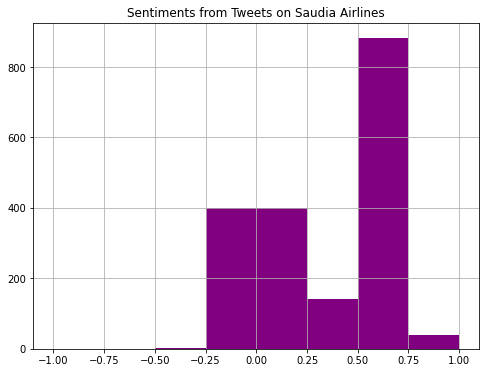

In [78]:
getPolarityPlot(saudia_airlines['polarity'], "Saudia Airlines")

it is clear that the majority of tweets have positive santiment

#Classify the tweets based on polarity value 

In [72]:
# Create a function to compute negative (-1), neutral (0) and positive (+1) analysis
def getSentiment(score):
  if score < 0:
    return 'Negative'
  elif score == 0:
    return 'Neutral'
  else:
    return 'Positive'

In [79]:
saudia_airlines['sentiment'] = saudia_airlines['polarity'].apply(getSentiment)

In [74]:
saudia_airlines.head(10)

,Unnamed: 0,tweet_id,created_at,text,likes,retweeted,location,language,airline,Tweet_nonstop,Sentiment_confidence,Polarity,Sentiment
0,14,1335393841810202624,2020-12-06 01:21:16,dear guest there is no flight from india to s...,1,False,Saudi Arabia,en,Saudi_airlines,"['', 'dear', 'guest', 'flight', 'india', 'saud...",0.900,0.600,Positive
1,23,1335337522738720770,2020-12-05 21:37:29,hello dear guest we hope you check and be inf...,1,False,Saudi Arabia,en,Saudi_airlines,"['', 'hello', 'dear', 'guest', 'hope', 'check'...",0.375,-0.125,Negative
2,29,1335334320014315521,2020-12-05 21:24:45,hello dear guest please provide us with the b...,0,False,Saudi Arabia,en,Saudi_airlines,"['', 'hello', 'dear', 'guest', 'please', 'prov...",0.400,0.100,Positive
3,38,1335322063851167748,2020-12-05 20:36:03,dear guest there is no flight from india to s...,1,False,Saudi Arabia,en,Saudi_airlines,"['', 'dear', 'guest', 'flight', 'india', 'saud...",0.000,0.000,Neutral
4,43,1335314759588122626,2020-12-05 20:07:02,hello dear guest you can follow up the flight...,1,False,Saudi Arabia,en,Saudi_airlines,"['', 'hello', 'dear', 'guest', 'follow', 'flig...",0.000,0.000,Neutral
5,50,1335306576312356865,2020-12-05 19:34:31,dear guest there is no flight from india to s...,0,False,Saudi Arabia,en,Saudi_airlines,"['', 'dear', 'guest', 'flight', 'india', 'saud...",0.000,0.000,Neutral
6,51,1335304974679613443,2020-12-05 19:28:09,hello dear valued guest once the confirmation...,1,False,Saudi Arabia,en,Saudi_airlines,"['', 'hello', 'dear', 'valued', 'guest', 'conf...",0.000,0.000,Neutral
7,53,1335276146653589507,2020-12-05 17:33:36,dear guest there is no flight from india to s...,0,False,Saudi Arabia,en,Saudi_airlines,"['', 'dear', 'guest', 'flight', 'india', 'saud...",0.000,0.000,Neutral
8,55,1335275872295804928,2020-12-05 17:32:30,dear guest there is no flight from india to s...,0,False,Saudi Arabia,en,Saudi_airlines,"['', 'dear', 'guest', 'flight', 'india', 'saud...",0.000,0.000,Neutral
9,57,1335266364739694593,2020-12-05 16:54:44,hello dear guest imran please provide us with...,0,False,Saudi Arabia,en,Saudi_airlines,"['', 'hello', 'dear', 'guest', 'imran', 'pleas...",0.400,0.100,Positive


# visualizing the seniment

In [80]:
# Data balance
def createPieChartFor(t_df):
    Lst = 100*t_df.value_counts()/len(t_df)
    
    # set data for pie chart
    labels = t_df.value_counts().index.values
    sizes =  Lst 
    
    # set labels
    fig1, ax1 = plt.subplots()
    ax1.pie(sizes, labels=labels, autopct='%1.2f%%', shadow=True, startangle=90)
    ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
    plt.show()

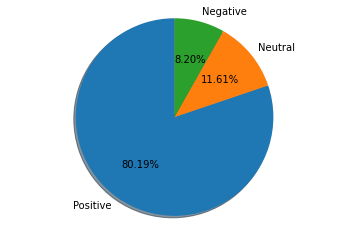

In [81]:
createPieChartFor(saudia_airlines.sentiment)

#Save the data set

In [86]:
saudia_airlines.to_csv('saudia_airlines_classified.csv')
!cp saudia_airlines_classified.csv "./gdrive/My Drive/datasets/twitter_analysis/"